## Basic machine learning classifiers performance comparison

In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import InstanceHardnessThreshold

from yellowbrick.model_selection import FeatureImportances

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/cleaned_data_general_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106982 entries, 0 to 106981
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Gender                106982 non-null  int64
 1   Hypertension          106982 non-null  int64
 2   Diabetes              106982 non-null  int64
 3   Alcoholism            106982 non-null  int64
 4   Handicap              106982 non-null  int64
 5   SMS_received          106982 non-null  int64
 6   Show                  106982 non-null  int64
 7   AppointmentMonth      106982 non-null  int64
 8   AppointmentDayOfWeek  106982 non-null  int64
 9   AgeGroupInt           106982 non-null  int64
 10  AwaitingTimeGroup     106982 non-null  int64
dtypes: int64(11)
memory usage: 9.0 MB


In [2]:
X = df.drop(['Show'], axis=1)
y = df['Show']

iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [4]:
nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

nb_pred = nb_clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, nb_pred))
print('F1: ', f1_score(y_test, nb_pred))
print('Recall: ', recall_score(y_test, nb_pred))
print('Precision: ', precision_score(y_test, nb_pred))

Accuracy:  0.8695418204182042
F1:  0.8779926666187361
Recall:  0.9383740587060089
Precision:  0.8249121858957038


In [5]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, lr_pred))
print('F1: ', f1_score(y_test, lr_pred))
print('Recall: ', recall_score(y_test, lr_pred))
print('Precision: ', precision_score(y_test, lr_pred))

Accuracy:  0.8849938499384994
F1:  0.8900485080111715
Recall:  0.9305363454741048
Precision:  0.8529370333849838


In [6]:
svc_clf = SVC()

svc_clf.fit(X_train, y_train)

svc_pred = svc_clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, svc_pred))
print('F1: ', f1_score(y_test, svc_pred))
print('Recall: ', recall_score(y_test, svc_pred))
print('Precision: ', precision_score(y_test, svc_pred))

Accuracy:  0.8906057810578106
F1:  0.8930798707641446
Recall:  0.913324112494237
Precision:  0.8737136136430461


In [7]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    max_iter=500,
    alpha=0.0001,
    solver='sgd',
    random_state=21,
    tol=0.000000001
)

mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("F1: ", f1_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))

Accuracy:  0.9247386223862238
F1:  0.9267818412983321
Recall:  0.9522053173505456
Precision:  0.9026806526806527


/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
kmeans_cls = KMeans(n_clusters=2, random_state=42)

kmeans_cls.fit(X_train, y_train)

kmeans_pred = kmeans_cls.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, kmeans_pred))
print('F1: ', f1_score(y_test, kmeans_pred))
print('Recall: ', recall_score(y_test, kmeans_pred))
print('Precision: ', precision_score(y_test, kmeans_pred))

Accuracy:  0.4280442804428044
F1:  0.4397590361445783
Recall:  0.4487475026894114
Precision:  0.4311235789162853


/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train, y_train)

knn_pred = knn_cls.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, knn_pred))
print('F1 Score: ', f1_score(y_test, knn_pred))
print('Recall Score: ', recall_score(y_test, knn_pred))
print('Precision Score: ', precision_score(y_test, knn_pred))

Accuracy Score:  0.9411131611316114
F1 Score:  0.9423279626562264
Recall Score:  0.9617335177501153
Precision Score:  0.923690036900369


In [10]:
dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(X_train, y_train)

dt_pred = dt_cls.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, dt_pred))
print('F1 Score: ', f1_score(y_test, dt_pred))
print('Recall Score: ', recall_score(y_test, dt_pred))
print('Precision Score: ', precision_score(y_test, dt_pred))

Accuracy Score:  0.9466482164821648
F1 Score:  0.9481237853191807
Recall Score:  0.9746426924850161
Precision Score:  0.9230097511279289


/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


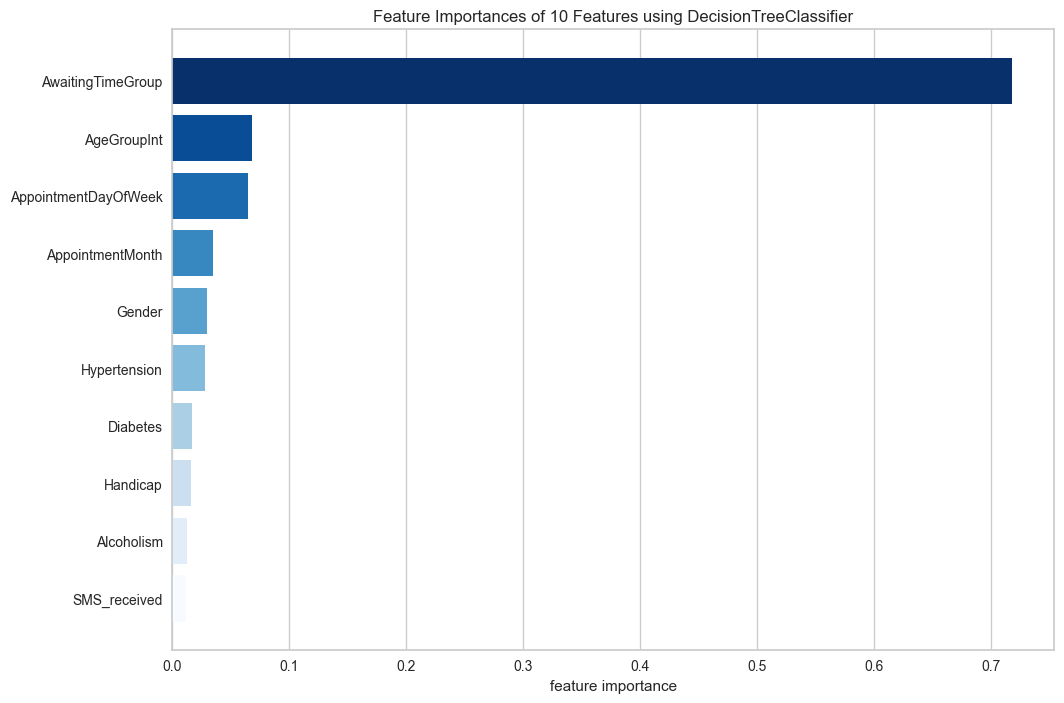

<Axes: title={'center': 'Feature Importances of 10 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [11]:
viz = FeatureImportances(
    dt_cls,
    size=(1080, 720),
    max_num_features=10,
    relative=False,
    colormap='Blues',
)
viz.fit(X_train, y_train)
viz.show()

In [12]:
models_results = pd.DataFrame({
    'Model':
        ['KNN', 'Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'Decision Tree', 'K-Means', 'MLP'],
    'F1 score':
        [f1_score(y_test, knn_pred), f1_score(y_test, lr_pred), f1_score(y_test, svc_pred), f1_score(y_test, nb_pred), f1_score(y_test, dt_pred), f1_score(y_test, kmeans_pred), f1_score(y_test, predictions)],
    'Recall score':
        [recall_score(y_test, knn_pred), recall_score(y_test, lr_pred), recall_score(y_test, svc_pred), recall_score(y_test, nb_pred), recall_score(y_test, dt_pred), recall_score(y_test, kmeans_pred), recall_score(y_test, predictions)],
    'Precision score':
        [precision_score(y_test, knn_pred), precision_score(y_test, lr_pred), precision_score(y_test, svc_pred), precision_score(y_test, nb_pred), precision_score(y_test, dt_pred), precision_score(y_test, kmeans_pred), precision_score(y_test, predictions)],
    'Accuracy score':
        [accuracy_score(y_test, knn_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, svc_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, kmeans_pred), accuracy_score(y_test, predictions)]
})
models_results = models_results.sort_values(by='F1 score', ascending=False)

models_results

,Model,F1 score,Recall score,Precision score,Accuracy score
4,Decision Tree,0.948124,0.974643,0.923010,0.946648
0,KNN,0.942328,0.961734,0.923690,0.941113
6,MLP,0.926782,0.952205,0.902681,0.924739
2,Support Vector Machines,0.893080,0.913324,0.873714,0.890606
1,Logistic Regression,0.890049,0.930536,0.852937,0.884994
3,Naive Bayes,0.877993,0.938374,0.824912,0.869542
5,K-Means,0.439759,0.448748,0.431124,0.428044


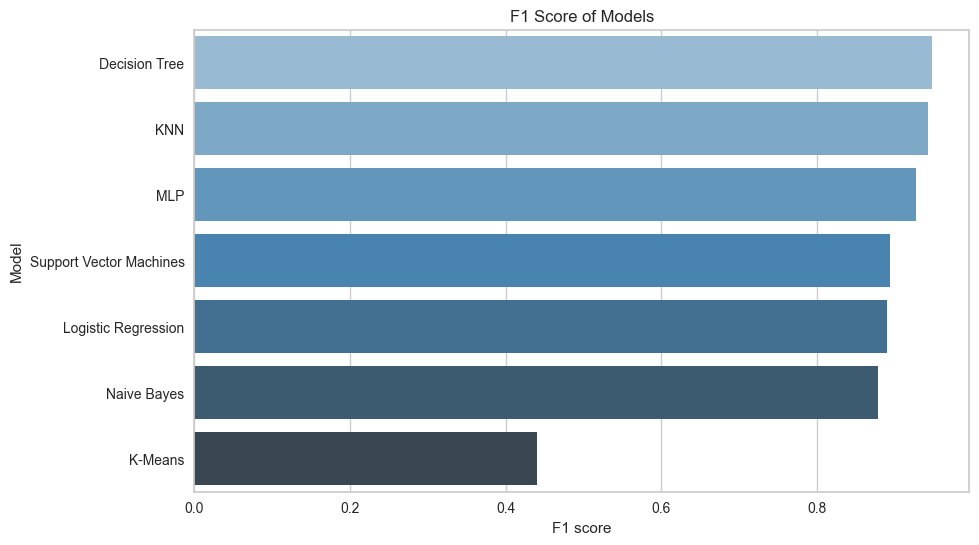

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 score', y='Model', data=models_results, palette='Blues_d')
plt.title('F1 Score of Models')
plt.show()